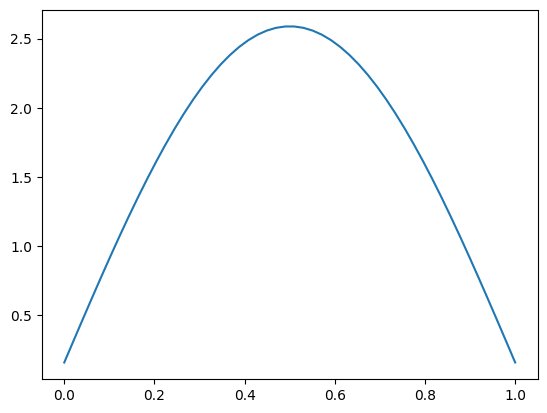

In [22]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

N = 50 # Количество узлов в сетке
x = np.linspace(0, 1, N)

k = 0.01
u0 = np.sin(np.pi * x)

diagonals = np.zeros((3, N)) # Создаем матрицу с тремя диагоналями
diagonals[0,:] = -1
diagonals[1,:] = 2
diagonals[2,:] = -1
A = sparse.spdiags(diagonals, [-1,0,1], N, N, format="csr") # Создаем разреженную матрицу

for i in range(1): # 100 временных шагов
    b = k * u0
    u = spsolve(A, b) # Решаем систему уравнений
    plt.plot(x, u) # Визуализируем результат
    u0 = u
plt.show()

In [108]:
import numpy as np
import matplotlib.pyplot as plt
 

 
def FinDifSolver(x_start, x_end, dx, E_max, accuracy): #Finit Differences Solver
    x_start   #границы потенциальной ямы
    x_end
    dx    #шаг по координате
    E_max #максимальное обсчитываемое значение энергии 
    accuracy
    
    x_grid = np.arange(x_start, x_end + dx, dx)     #создаем сетку
    num_x = len(x_grid)
    
    psy = np.zeros(num_x)   #инициализация массивов для хранения значений psy

    psy[1] = 1.0*dx  #начальные условия для psy
    psy[0] = 0.0  
    E_self = []     #массив собственных значений энергии


    for E in range (1, E_max*10): #обходим различные значения энергии (не обязательно собственные) с шагом 0.1. Здесть E = Е/(h^2/2m) - это приведенная энергия 
        max_psy = 0 #будем фиксировать амплитуду psy
        for j in range(1, num_x - 1):
            psy[j+1] = 2*psy[j] - psy[j-1] - psy[j]*E/10/num_x**2
            if psy[j+1] > max_psy:
                max_psy = psy[j+1]
        
        if abs(max_psy/psy[num_x-1])>accuracy: #выбираем собственные значения энергии (те, при которых на противоположном конце ямы волновая функция тоже обращается в 0) 
                E_self += [E - 1]         #собственными будут функции у которых в яму укладвается целое число полуволн
                                        #здесь мы выбираем Е при которых значение psy мало по сравнению с амплитудой. При достаточно малом шаге по х мы получим несколько близких значений Е, соответствующих единственному настоящему Е
                                        #по-хорошему надо выбрать из них энергию с наименьшим значением psy на краю ямы
                                        #еще лучше в окрестности найденных значений пройтись циклом с малым шагом по энергии, чтобы существенно повысить точность вычисления Е 



    #строим графики 
    fig, ax = plt.subplots(figsize=(16,9))
    plt.title("График волновой функции", fontsize = 40)
    ax.grid()
    ax.legend()
    plt.legend(fontsize = 20)
    plt.xlabel('$x$', fontsize = 30)
    plt.ylabel("$\psi(x)$", rotation=0, horizontalalignment='right',fontsize = 30)
    plt.tick_params('both', size = 10, labelsize = 20)
    for E in E_self:        
        for j in range(1, num_x - 1):
            psy[j+1] = 2*psy[j] - psy[j-1] - psy[j]*E/10/num_x**2
        plt.plot(x_grid, psy)
    plt.show()
 
 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


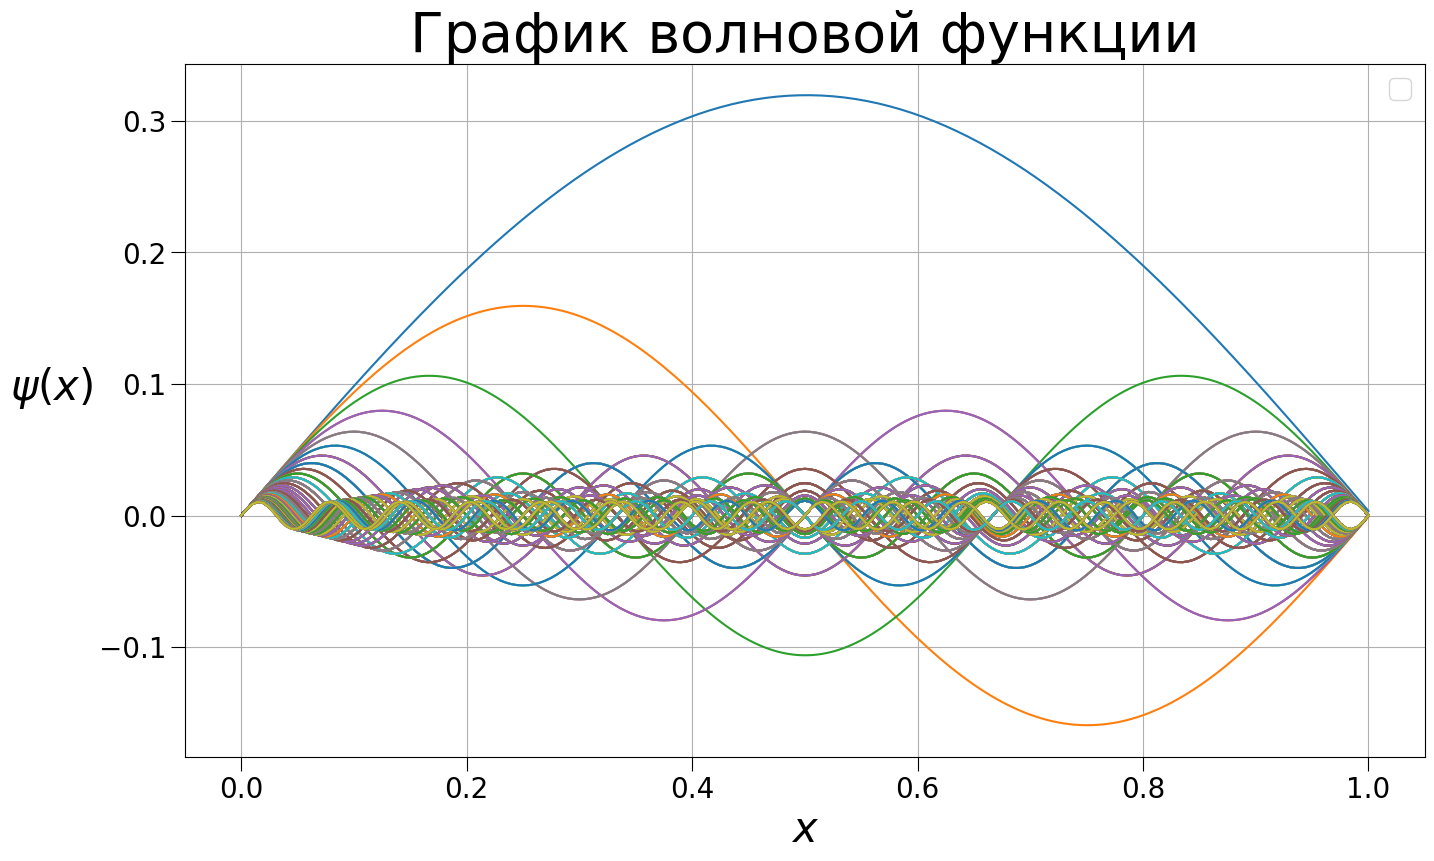

In [118]:
FinDifSolver(0, 1, 0.005, 10000, 200)